# Exploring MovieLens : clustering

In [1]:
import pandas as pd
import numpy as np 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import string

from collections import Counter

## Importing the data

In [2]:
org_ratings = pd.read_csv('/Data/ratings.csv')
org_movies = pd.read_csv('/Data/movies.csv')
org_ratings.head(), org_movies.head()

(   userId  movieId  rating   timestamp
 0       1       31     2.5  1260759144
 1       1     1029     3.0  1260759179
 2       1     1061     3.0  1260759182
 3       1     1129     2.0  1260759185
 4       1     1172     4.0  1260759205,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

In [3]:
users = org_ratings.userId.unique()
movies = org_ratings.movieId.unique()
rating = org_ratings.rating.unique()
len(users), len(movies), len(rating)

(671, 9066, 10)

In [4]:
#This will allow me to go from a discontinuous to a continuous index for the movies and users
#This will be handy when I create my feature arrays. 
userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

#Now, if I want to go back from a continuous index to the original one, I also define a function to do that
movieidx2id = {i:o for i,o in enumerate(movies)}

In [5]:
new_ratings = org_ratings.copy()

new_ratings.movieId = org_ratings.movieId.apply(lambda x: movieid2idx[x])
new_ratings.userId = org_ratings.userId.apply(lambda x: userid2idx[x])

Now, I want to make a 10 by 671 by 9066 matrix. For each depth 1-5, a value 1 is assigned to the 2D matrix if the user has rated a movie by the depth (i.e. x out of 5) or a 0 if not. 

This allows us to deal with the challenge of missing data, as not every user has rated every movie (and sklearn doesn't like missing data). I'll begin by sorting the data, and removing the timestamp (which I won't include in my analysis right now).

In [6]:
new_ratings.drop('timestamp', axis = 1)

,userId,movieId,rating
0,0,0,2.5
1,0,1,3.0
2,0,2,3.0
3,0,3,2.0
4,0,4,4.0
5,0,5,2.0
6,0,6,2.0
7,0,7,2.0
8,0,8,3.5
9,0,9,2.0


In [7]:
X_features = np.zeros((len(movies), len(users), len(rating)))

In [8]:
org_ratings.movieId[0]-1, org_ratings.userId[0]-1, int(2*org_ratings.rating[0])-1

(30, 0, 4)

In [9]:
for i in range(len(new_ratings)):
    X_features[new_ratings.movieId[i]-1] [new_ratings.userId[i]-1][int(2*new_ratings.rating[i])-1]= 1

In [10]:
X_features.shape

(9066, 671, 10)

In [11]:
TwoDim_X = X_features.reshape(len(movies),-1)

In [12]:
TwoDim_X.shape

(9066, 6710)

Awesome; that was easy! 

Now, onto clustering. 

## Reducing Data Dimensionality

Reduce the dimensions of the data, from 6710 dimensions to 50 using PCA 

In [13]:
X_50dim = PCA(n_components =50).fit_transform(TwoDim_X)

Reduced the dimensions to 2 using PCA: 

In [14]:
X_PCA = PCA(n_components = 2).fit_transform(TwoDim_X)

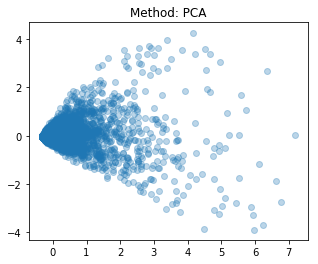

In [15]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(111)

ax.scatter(X_PCA[:,0], X_PCA[:,1], alpha = 0.3)
plt.title('Method: PCA')
#plt.savefig('PCA.png', dpi = 300)
plt.show()

This doesn't reveal any clusters. 

Lets now, use t-SNE to further reduce the dimensions from X_50dim to 2. 

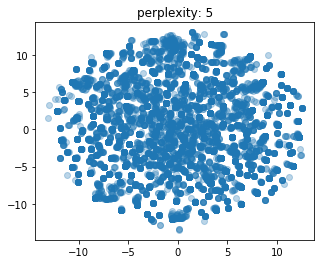

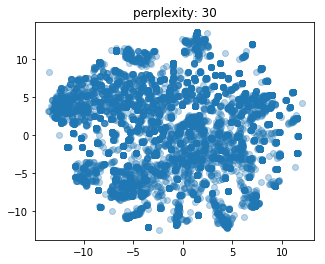

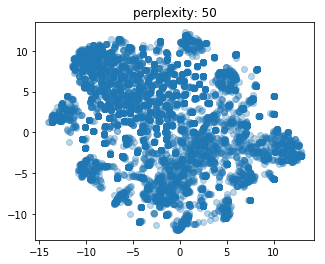

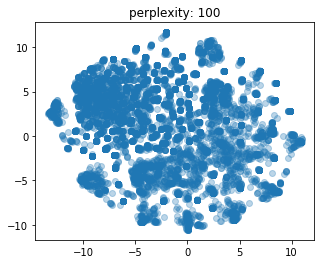

In [156]:
perplexities= [5, 30, 50, 100]
reduced_Xarr = []

for i in perplexities: 
    X_to_plot = TSNE(n_components=2, perplexity = i, random_state=0).fit_transform(X_50dim)
    reduced_Xarr.append(X_to_plot)
    
    fig = plt.figure(figsize = (5,4))
    ax = fig.add_subplot(111)
    ax.scatter(X_to_plot[:,0], X_to_plot[:,1], alpha = 0.3)
    plt.title('perplexity: ' + str(i))
    plt.show()

It's clear that higher perplexities seem to more clearly show clusters. I'm going to run t-SNE with perplexities of 50 and 100 for 5000 iterations, to make sure it has converged. 

In [16]:
X_50_iter5000 = TSNE(n_components=2, perplexity = 50, random_state=0, n_iter=5000).fit_transform(X_50dim)

In [17]:
X_100_iter5000 = TSNE(n_components=2, perplexity = 100, random_state=0, n_iter=5000).fit_transform(X_50dim)

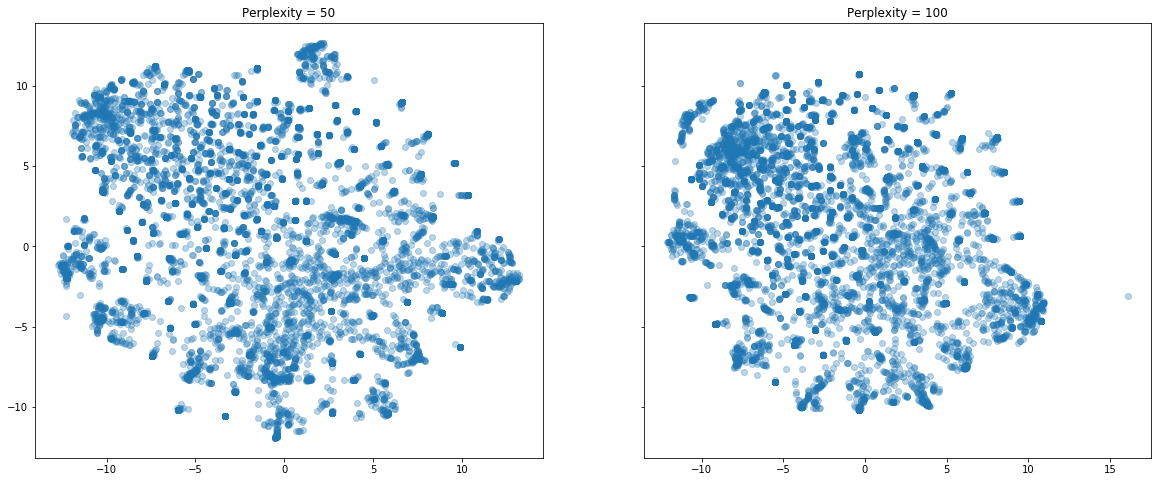

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = [20,8])

ax1.scatter(X_50_iter5000[:,0], X_50_iter5000[:,1], alpha = 0.3)
ax1.set_title('Perplexity = 50')
ax2.scatter(X_100_iter5000[:,0], X_100_iter5000[:,1], alpha = 0.3)
ax2.set_title('Perplexity = 100')

plt.show()

The recommended range of perplexities is 5-50, and here 50 does seem to provide clearer clusters than 100; I'll therefore keep using X_50_iter5000

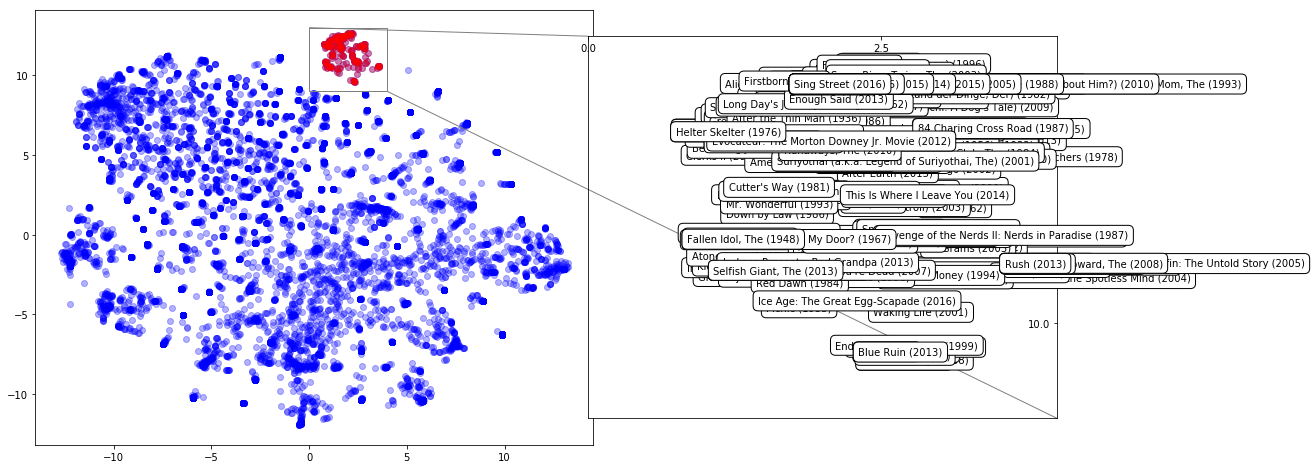

[('Drama', 161), ('Comedy', 100), ('Romance', 55), ('Thriller', 40), ('Crime', 33), ('Documentary', 31), ('Action', 30), ('Adventure', 21), ('Musical', 20), ('Mystery', 15), ('Sci-Fi', 15), ('Horror', 14), ('Film-Noir', 12), ('Animation', 12), ('Children', 11), ('Fantasy', 10), ('War', 10), ('IMAX', 7), ('Western', 4)] 1989.47509579 3.35479458179


In [34]:
reduced_X = X_50_iter5000

#isolate the elements which are in that subplot
#First, add indices, since sliced_X will remove them
id = [i for i in xrange(len(reduced_X))]
sliced_X = np.insert(reduced_X, 0, id, axis=1)

x1, x2, y1, y2 = 4, 0, 13, 9
#x1, x2, y1, y2 = -7, -12, -3, -7
#x1, x2, y1, y2 = -2, -7, 12, 9
#x1, x2, y1, y2 = 5.5, 2, -8, -12.5
#x1, x2, y1, y2 = -10, -15, 5, 0
#x1, x2, y1, y2 = 7, 3, 8,4.5


sliced_X = sliced_X[(sliced_X[:,1] < x1) & (sliced_X[:,1] > x2)
                    & (sliced_X[:,2] < y1) & (sliced_X[:,2] > y2)]

def contains_special(title):
    all_normal_characters = string.ascii_letters + string.digits + string.punctuation + ' '
    
    def is_special(character):
        return character not in all_normal_characters
    if [character for character in title if is_special(character)]:
        return True

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

ax.scatter(reduced_X[:,0], reduced_X[:,1],color = 'b', alpha = 0.3)

axins = zoomed_inset_axes(ax, 6, loc = 5) # zoom = 6

# sub region of the original image
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

#label them 
for i in range(len(sliced_X)):
    new_movie_id = int(sliced_X[i][0])
    old_movie_id = movieidx2id[new_movie_id]
    old_movie_index = np.where(org_movies.movieId == old_movie_id)[0][0]
    #movie_genres = org_movies.genres[old_movie_index].split('|')
    title = org_movies.title[old_movie_index]
    
    if contains_special(title) != True: #aka 'if this can be added to the plot'
        axins.annotate(s = title, xy = (sliced_X[i][1], sliced_X[i][2]),
                     xycoords = 'data', 
                     bbox=dict(boxstyle='round,pad=0.5', fc='white') 
                      )

ax.scatter(sliced_X[:,1], sliced_X[:,2], c = 'r', alpha = 0.3)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec = '0.5')
#fig.savefig('cluster.png', dpi = 500)
plt.show()

ratings = []
genres = []
years = []
for i in range(len(sliced_X)): 
    new_movie_id = sliced_X[i][0]
    # first step is finding the movie id 
    old_movie_id = movieidx2id[new_movie_id]
    old_movie_index = np.where(org_movies.movieId == old_movie_id)[0][0]
    # I have the genres at org_movies.genres[old_movie_index]
    #now I want to split it up based on the | character
    title = org_movies.title[old_movie_index]
    movie_genres = org_movies.genres[old_movie_index].split('|')
    year = title[title.find("(")+1:title.find(")")]
    ratings.append(new_ratings.rating[new_ratings.movieId == new_movie_id].mean())
    for k in range(len(movie_genres)):
        genres.append(movie_genres[k])  
    if (year.isdigit()):
        years.append(int(year))  

words_to_count = genres
c = Counter(words_to_count)
print c.most_common(), np.asarray(years).mean(), np.asarray(ratings).mean()


Looking at individual movies like this also doesn't reveal much (eg. Helter Skelter, a documentary about Charles Manson, and Sing Street, a 2016 Romantic Drama, are clustered together). 

Instead, lets try analyzing the averages for some of the bigger clusters. 

To begin with, lets create a baseline. 

In [27]:
#Get data about the entire dataset. 

reduced_X = X_50_iter5000

id = [i for i in xrange(len(reduced_X))]
sliced_X = np.insert(reduced_X, 0, id, axis=1)
total_genres = []
genres = []
mode_genres = []
total_years = []
total_ratings = []
for i in range(len(sliced_X)): 
    new_movie_id = sliced_X[i][0]
    # first step is finding the movie id 
    old_movie_id = movieidx2id[new_movie_id]
    old_movie_index = np.where(org_movies.movieId == old_movie_id)[0][0]
    # I have the genres at org_movies.genres[old_movie_index]
    #now I want to split it up based on the | character
    title = org_movies.title[old_movie_index]
    movie_genres = org_movies.genres[old_movie_index].split('|')
    year = title[title.find("(")+1:title.find(")")]
    total_ratings.append(new_ratings.rating[new_ratings.movieId == new_movie_id].mean())
    for k in range(len(movie_genres)):
        genres.append(movie_genres[k])  
    if (year.isdigit()):
        total_years.append(int(year))  
        
words_to_count = genres
total_genres = Counter(words_to_count).most_common()
print total_genres,  np.asarray(total_years).mean(), np.asarray(total_ratings).mean()

[('Drama', 4328), ('Comedy', 3307), ('Thriller', 1717), ('Action', 1543), ('Romance', 1541), ('Adventure', 1116), ('Crime', 1092), ('Horror', 872), ('Sci-Fi', 791), ('Fantasy', 653), ('Children', 582), ('Mystery', 537), ('Documentary', 487), ('Animation', 447), ('Musical', 394), ('War', 366), ('Western', 168), ('IMAX', 153), ('Film-Noir', 121), ('(no genres listed)', 17)] 1991.873738 3.29205425251


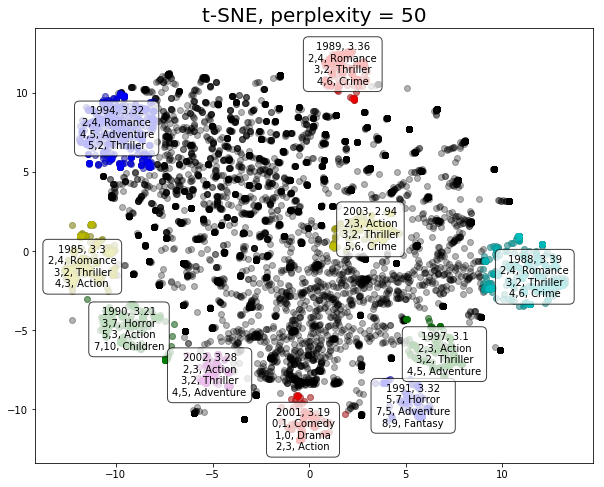

In [28]:
reduced_X = X_50_iter5000

clusters = [[3,0,13,9], [-7,-12,-3,-7], [6.5, 3, -8, -12.5], [-10, -15, 3, -3],
           [14,9, 1,-4], [-4, -7, -6.5, -9.5], [2,-2, -9,-13], [-8, -13, 10, 5], 
            [8,5,-4,-8], [5,1, 2.5,0]]


def genre_diff(cluster_genres, total_genres):
    #This method returns the difference in genres between a cluster and the mean
    cluster_genres_only = np.asarray([i[0] for i in cluster_genres])
    total_genres_only = np.asarray([i[0] for i in total_genres])

    dif = []
    for i in range(len(cluster_genres)):
        if cluster_genres_only[i] != total_genres_only[i]:
            dif.append((i, np.argwhere(total_genres_only ==  cluster_genres_only[i])[0][0], cluster_genres_only[i]))
    return dif


fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

ax.scatter(reduced_X[:,0], reduced_X[:,1], color = 'k', alpha = 0.3)

for i in range(len(clusters)): 
    x1 = clusters[i][0]
    x2 = clusters[i][1]
    y1 = clusters[i][2]
    y2 = clusters[i][3]
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'r', 'b', 'g', 'y']

    
    #isolate the elements which are in that subplot
    #First, add indices, since sliced_X will remove them
    id = [g for g in xrange(len(reduced_X))]
    sliced_X = np.insert(reduced_X, 0, id, axis=1)

    sliced_X = sliced_X[(sliced_X[:,1] <x1) & (sliced_X[:,1] > x2)
                        & (sliced_X[:,2] < y1) & (sliced_X[:,2] > y2)]
    
    ax.scatter(sliced_X[:,1], sliced_X[:,2], 
               color = colors[i], alpha = 0.3)
    
    #Now, I want to get all the information about the clusters
    ratings = []
    genres = []
    years = []
    for z in range(len(sliced_X)): 
        new_movie_id = sliced_X[z][0]
        # first step is finding the movie id 
        old_movie_id = movieidx2id[new_movie_id]
        old_movie_index = np.where(org_movies.movieId == old_movie_id)[0][0]
        # I have the genres at org_movies.genres[old_movie_index]
        #now I want to split it up based on the | character
        title = org_movies.title[old_movie_index]
        movie_genres = org_movies.genres[old_movie_index].split('|')
        year = title[title.find("(")+1:title.find(")")]
        ratings.append(new_ratings.rating[new_ratings.movieId == new_movie_id].mean())
        for k in range(len(movie_genres)):
            genres.append(movie_genres[k])  
        if (year.isdigit()):
            years.append(int(year))  

    words_to_count = genres
    cluster_genres = Counter(words_to_count).most_common()
    
    dif = genre_diff(cluster_genres, total_genres)
    
    genre_differences = ''
    for i in range(3):
        genre_differences +='\n' + str(dif[i][0]) + ',' + str(dif[i][1]) + ', ' + dif[i][2]
    
    plt.annotate(s = str(int(round(np.asarray(years).mean()))) + ', ' + str(round(np.asarray(ratings).mean(),2))
                 + genre_differences,
                 xy = (sliced_X[:,1].mean(), sliced_X[:,2].mean()),
                 xycoords = 'data', 
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.75) ,
                verticalalignment='center', horizontalalignment = 'center')
   
plt.title('t-SNE, perplexity = 50', size = 20)    
plt.show()

